## Lab 1: Malware Classification using KNN and SVM

# Dataset: CLaMP (Classification of Malwares)

Dataset link: https://data.mendeley.com/datasets/xvyv59vwvz/1

### **Description**
Dataset related to Portable Executable files for malware detection. The details can be found in the published article titled "A learning model to detect maliciousness of portable executable using integrated feature set" authored by  Ajit Kumar, K.S.Kuppusamy, and G.Aghila.

In [3]:
import os
import pandas as pd 

# Loading Dataset
dataset_path = r'D:\\Akasuki Bench\\AI\\Assignments\\AI_Labs\\Labs\\notebooks\\AI in Cyber Security'
filename = 'ClaMP_Integrated-5184.csv'
filepath = os.path.join(dataset_path, filename)
df = pd.read_csv(filepath)
df

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,144,3,4,65535,184,216,5,1,1,1,...,0,5,0,NoPacker,6.174602,3.155928,365568,7.546568,0,1
5206,80,2,4,65535,184,256,7,1,0,1,...,4,3,0,NoPacker,0.000000,0.000000,98816,6.947195,0,1
5207,144,3,4,65535,184,216,5,1,0,1,...,2,3,0,NoPacker,6.503422,3.790871,227328,7.823114,0,1
5208,144,3,4,65535,184,248,5,1,1,1,...,1,4,0,NoPacker,6.115208,7.919091,271616,7.886012,0,1


In [4]:
# Replacing Null values with 0. ML classifer cannot learn on Null values
df.fillna(0, inplace=True)

In [5]:
# keep only numeric columns for variance check
numeric_df = df.select_dtypes(include=['number'])

# find columns with very little variance
insignificant_columns = numeric_df.std()[numeric_df.std() < 0.0001].index
insignificant_columns


Index(['FH_char1', 'FH_char11', 'FH_char13', 'SectionAlignment',
       'FileAlignment', 'OH_DLLchar5', 'OH_DLLchar6', 'OH_DLLchar10'],
      dtype='object')

In [6]:
# Droping these columns due to their insignificance
# Drop insignificant columns directly
df = df.drop(insignificant_columns, axis=1)



In [7]:
# Peak on the dataset
df.head()


,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char2,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,0,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,0,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,0,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,0,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0


In [8]:
# check dataset if each column and its name
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   e_cblp                       5210 non-null   int64  
 1   e_cp                         5210 non-null   int64  
 2   e_cparhdr                    5210 non-null   int64  
 3   e_maxalloc                   5210 non-null   int64  
 4   e_sp                         5210 non-null   int64  
 5   e_lfanew                     5210 non-null   int64  
 6   NumberOfSections             5210 non-null   int64  
 7   CreationYear                 5210 non-null   int64  
 8   FH_char0                     5210 non-null   int64  
 9   FH_char2                     5210 non-null   int64  
 10  FH_char3                     5210 non-null   int64  
 11  FH_char4                     5210 non-null   int64  
 12  FH_char5                     5210 non-null   int64  
 13  FH_char6          

In [9]:
# Encodings Labels so that they are compatible with machine leanring classifiers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    if df[i].dtype == 'object':
        print(f'Applying LabelEncoder on column `{i}`')
        df[i] = le.fit_transform(df[i])
    else:
        continue
X = df.drop(['class'], axis=1)
y = df['class']


Applying LabelEncoder on column `packer_type`


In [10]:
# check frequency of each class
print(df['class'].value_counts())
class_labels = [0, 1]


class
1    2722
0    2488
Name: count, dtype: int64


In [11]:
# Dividing data into training, testing and validation
from sklearn.model_selection import train_test_split

# split whole dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=103)

# now further split the remaining train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=103)


In [12]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(5210, 61) (5210,)
(3334, 61) (3334,)
(834, 61) (834,)
(1042, 61) (1042,)


In [13]:
# Scaling data. Default scaling is to scale the data to unit variance (or equivalent
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fit on train only
X_train = sc.fit_transform(X_train)
# apply same transformation on test and validation sets
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)


In [14]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# one function to print all evaluation metrics given true labels and predicted classes
def print_metrices(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    tn = cm[0][0] #tn
    fn = cm[0][1] #fn
    fp = cm[1][0] #fp
    tp = cm[1][1] #tp
    accuracy = (tp + tn) / (tp + tn + fn + fp)
    epsilon = 1e-7 # is used so that to avoid divide by zero error
    precision = tp / (tp + fp + epsilon)
    recall = tp / (tp + fn + epsilon)
    f1_score = 2 * recall * precision / (recall + precision)
    area_under_roc = metrics.roc_auc_score(y_test, y_pred)
    precisions, recalls, _ = metrics.precision_recall_curve(y_test, y_pred)
    area_under_pr = metrics.auc(recalls, precisions)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1-Score: {f1_score:.4f}')
    print(f'Area Under ROC Curve: {area_under_roc:.4f}')
    print(f'Area Under PR Curve: {area_under_pr:.4f}')
    print('Precison, Recall, F1-Score:\n', metrics.classification_report(y_test, y_pred, digits=4))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


## KNN Classifier

In [16]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

*** KNN Evaluation metrics with k=3 ***
Accuracy: 0.9693
Recall: 0.9705
Precision: 0.9739
F1-Score: 0.9722
Area Under ROC Curve: 0.9688
Area Under PR Curve: 0.9794
Precison, Recall, F1-Score:
               precision    recall  f1-score   support

           0     0.9678    0.9637    0.9657       468
           1     0.9705    0.9739    0.9722       574

    accuracy                         0.9693      1042
   macro avg     0.9691    0.9688    0.9690      1042
weighted avg     0.9693    0.9693    0.9693      1042



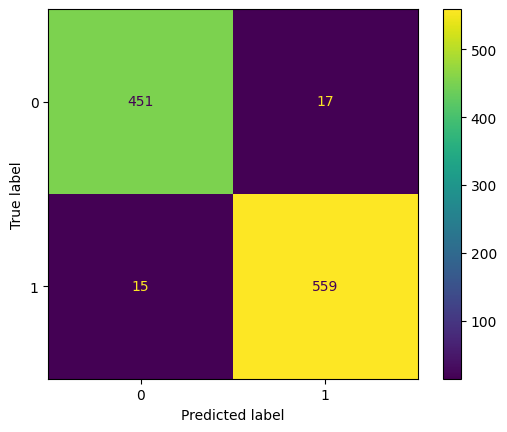

In [17]:
# Create KNN Classifier (K Nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# Print evaluation metrices
print('*** KNN Evaluation metrics with k=3 ***')
print_metrices(y_test, y_pred)

*** KNN Evaluation metrics with k=7 ***
Accuracy: 0.9626
Recall: 0.9701
Precision: 0.9617
F1-Score: 0.9659
Area Under ROC Curve: 0.9627
Area Under PR Curve: 0.9765
Precison, Recall, F1-Score:
               precision    recall  f1-score   support

           0     0.9535    0.9637    0.9586       468
           1     0.9701    0.9617    0.9659       574

    accuracy                         0.9626      1042
   macro avg     0.9618    0.9627    0.9622      1042
weighted avg     0.9627    0.9626    0.9626      1042



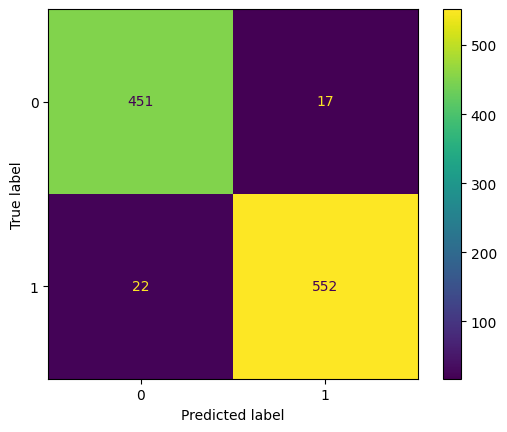

In [18]:
# Create KNN Classifier (K Nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# Print evaluation metrices
print('*** KNN Evaluation metrics with k=7 ***')
print_metrices(y_test, y_pred)

## SVM Classifier

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def plot_roc_curve_binary(y_true, y_prob, suptitle):
    fig = plt.figure(figsize=(5, 5))
    fig.suptitle(suptitle)

    FP_rate, TP_rate, _ = metrics.roc_curve(y_true, y_prob[:, 1])
    roc_auc = metrics.roc_auc_score(y_true, y_prob[:, 1])
    plt.plot(FP_rate, TP_rate, label=f'1 (roc_auc = {roc_auc:.4f})')

    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.legend(fontsize=12)


*** Evaluation metrices of SVM with Linear kernel ***
Accuracy: 0.9539
Recall: 0.9647
Precision: 0.9512
F1-Score: 0.9579
Area Under ROC Curve: 0.9542
Area Under PR Curve: 0.9714
Precison, Recall, F1-Score:
               precision    recall  f1-score   support

           0     0.9412    0.9573    0.9492       468
           1     0.9647    0.9512    0.9579       574

    accuracy                         0.9539      1042
   macro avg     0.9529    0.9542    0.9535      1042
weighted avg     0.9541    0.9539    0.9540      1042



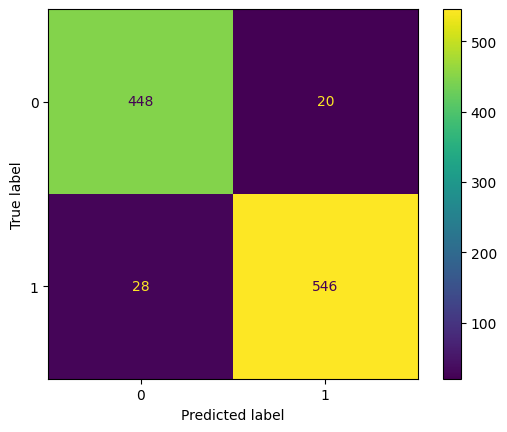

In [20]:
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('*** Evaluation metrices of SVM with Linear kernel ***')
print_metrices(y_test, y_pred)


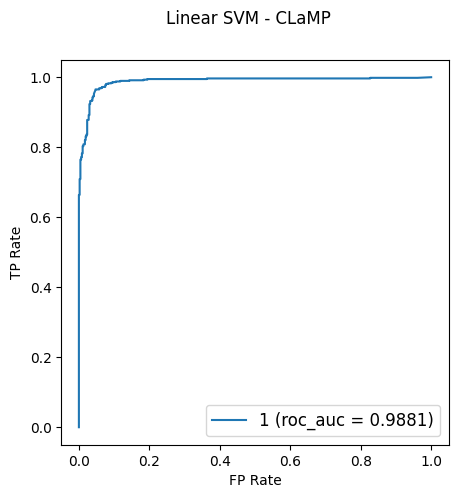

In [21]:
y_prob = svc.predict_proba(X_test)
plot_roc_curve_binary(y_test, y_prob, suptitle='Linear SVM - CLaMP')


*** Evaluation metrices of SVM with RBF kernel ***
Accuracy: 0.9645
Recall: 0.9621
Precision: 0.9739
F1-Score: 0.9680
Area Under ROC Curve: 0.9634
Area Under PR Curve: 0.9752
Precison, Recall, F1-Score:
               precision    recall  f1-score   support

           0     0.9675    0.9530    0.9602       468
           1     0.9621    0.9739    0.9680       574

    accuracy                         0.9645      1042
   macro avg     0.9648    0.9634    0.9641      1042
weighted avg     0.9645    0.9645    0.9645      1042



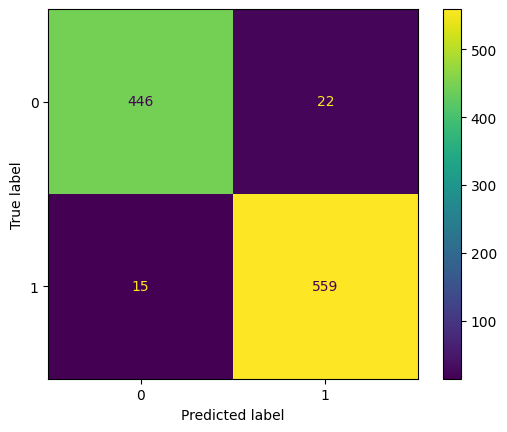

In [22]:
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('*** Evaluation metrices of SVM with RBF kernel ***')
print_metrices(y_test, y_pred)


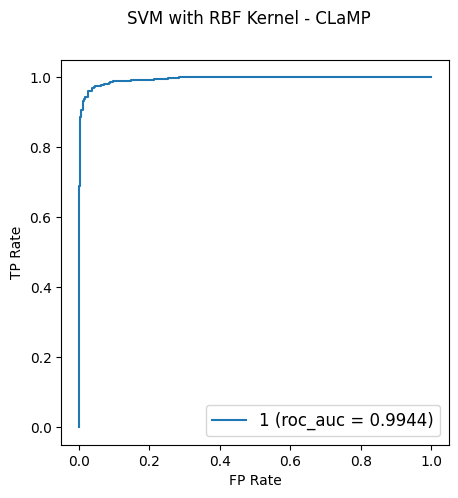

In [23]:
y_prob = svc.predict_proba(X_test)
plot_roc_curve_binary(y_test, y_prob, suptitle='SVM with RBF Kernel - CLaMP')


*** Evaluation metrices of SVM with Polynomial kernel ***
Accuracy: 0.9549
Recall: 0.9535
Precision: 0.9652
F1-Score: 0.9593
Area Under ROC Curve: 0.9537
Area Under PR Curve: 0.9689
Precison, Recall, F1-Score:
               precision    recall  f1-score   support

           0     0.9566    0.9423    0.9494       468
           1     0.9535    0.9652    0.9593       574

    accuracy                         0.9549      1042
   macro avg     0.9551    0.9537    0.9544      1042
weighted avg     0.9549    0.9549    0.9549      1042



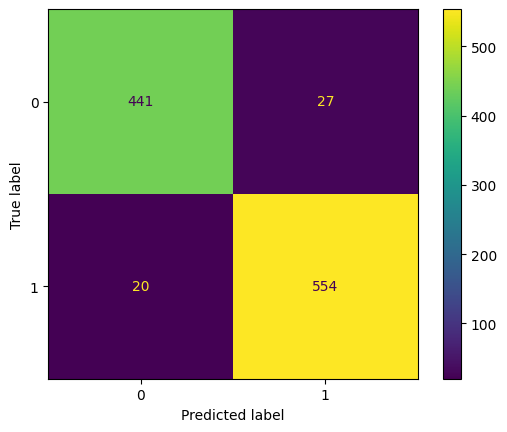

In [24]:
svc = SVC(kernel='poly', degree=2, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('*** Evaluation metrices of SVM with Polynomial kernel ***')
print_metrices(y_test, y_pred)


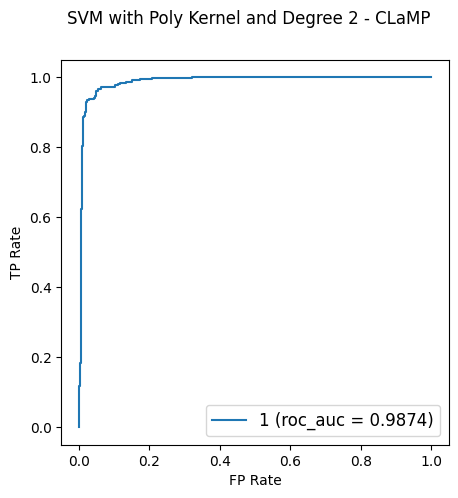

In [25]:
y_prob = svc.predict_proba(X_test)
plot_roc_curve_binary(y_test, y_prob, suptitle='SVM with Poly Kernel and Degree 2 - CLaMP')


# Dataset: Ransomware

Dataset Link: https://github.com/rissgrouphub/ransomwaredataset2016.git

In [26]:
# imports for data handling
# The os module allows to interact with the operating system for example reading and writing from directories
import os
# Powerful library for performing Different FUnctions on Arrays.
import numpy as np
# Pandas is used for data manipulation, analysis specially in tables of time series data.
import pandas as pd
# Seaborn is a python data visualization library based on matplotlib. it provides a high-level interface for drawing attractive and informative statistitcal graphics.
import seaborn as sns
# matplotlib is a comprehensive library plotting for creating static, animated, and interactive visualizatinos in Python.
import matplotlib.pyplot as plt
# This module implements specialized container datatypes providing alternatives to Python's general purpose built in containers, dict, list, set and tuple.
from collections import Counter

# imports for preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# imports for classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# imports for model evaluation
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


In [34]:
dataset_path = r'D:\\Akasuki Bench\\AI\\Assignments\\AI_Labs\\Labs\\notebooks\\AI in Cyber Security\\ransomwaredataset2016\\'
filename = 'RansomwareData.csv'
filepath = os.path.join(dataset_path, filename)


In [35]:
variable_names = open(os.path.join(dataset_path, 'VariableNames.txt'),encoding='utf-8').readlines()
columns = []
for idx, variable_name in enumerate(variable_names):
    variable_name = variable_name.split(';')
    columns.append(variable_name[1].strip())
columns = np.array(columns)
columns[1] = 'Label'
print(columns.shape)


(30970,)


In [36]:
family_names_file = open(os.path.join(dataset_path, 'Family Names ID.txt')).readlines()[2:]
family_names = {}
for idx, row in enumerate(family_names_file):
    row = row.strip()
    if len(row) <= 0: continue
    family_name, id = row[:-3].strip(), row[-3:].strip()
    if family_name != 'Goodware':
        family_name = family_name[1:-1]
    family_names[int(id)] = family_name
family_names


{0: 'Goodware',
 1: 'Critroni',
 2: 'CryptLocker',
 3: 'CryptoWall',
 4: 'KOLLAH',
 5: 'Kovter',
 6: 'Locker',
 7: 'MATSNU',
 8: 'PGPCODER',
 9: 'Reveton',
 10: 'TeslaCrypt',
 11: 'Trojan-Ransom'}

In [37]:
# read dataset
df = pd.read_csv(filepath, header=None)
df.columns = columns
# replace Null values with 0
df.fillna(0, inplace=True)
# shuffle rows for better train/val/test division
sampler = np.random.permutation(len(df))
df = df.take(sampler)
df = df.reset_index(drop=True)
# drop these columns due to their insignificance
df = df.drop(['ID'], axis=1)
columns = df.columns
# show dataframe
df


,Label,Ransomware Family,API:GetSystemDirectoryA,API:WriteConsoleA,API:NtOpenFile,API:NtCreateProcessEx,API:GetSystemInfo,API:WriteConsoleW,API:NtReadVirtualMemory,API:RemoveDirectoryA,...,STR:16258,STR:16259,STR:16260,STR:16261,STR:16262,STR:16263,STR:16264,STR:16265,STR:16266,STR:16267
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1520,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1521,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1522,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# df.apply function takes column one-by-one and return count of unique values
unique_vals_count_per_col = df.apply(lambda x: len(pd.unique(x)))
# Counter will count frequency of unique values, indicating number of columns with that unique value
print(Counter(unique_vals_count_per_col.values))
# those columns are relevant having more than one unique value
relevant_columns = unique_vals_count_per_col > 1
# select only relevant columns to remove irrelevant columns
df2 = df.iloc[:, relevant_columns.values]
columns = df.columns
# show dataframe
df2


Counter({np.int64(2): 23617, np.int64(1): 7351, np.int64(12): 1})


,Label,Ransomware Family,API:GetSystemDirectoryA,API:WriteConsoleA,API:NtOpenFile,API:NtCreateProcessEx,API:GetSystemInfo,API:WriteConsoleW,API:NtReadVirtualMemory,API:RemoveDirectoryA,...,STR:16247,STR:16252,STR:16253,STR:16255,STR:16256,STR:16259,STR:16260,STR:16261,STR:16264,STR:16267
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1520,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1521,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1522,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# separate dataframe into X and y
X = df2.drop(['Label', 'Ransomware Family'], axis=1)
y_binary = df2['Label']
y_multi = df2['Ransomware Family']


In [40]:
# check frequency of each binary class
class_labels_binary = df2['Label'].unique()
print(df2['Label'].value_counts())


Label
0    942
1    582
Name: count, dtype: int64


In [41]:
# check frequency of each multi class
class_labels_multi = df2['Ransomware Family'].unique()
print(df2['Ransomware Family'].value_counts())


Ransomware Family
0     942
2     107
6      97
9      90
5      64
7      59
1      50
3      46
11     34
4      25
10      6
8       4
Name: count, dtype: int64


## Evaluation Function

In [43]:
def get_one_vs_all(confusion_matrix, label):
    tp = confusion_matrix[label, label]
    fn = np.sum(confusion_matrix[label, :]) - tp
    fp = np.sum(confusion_matrix[:, label]) - tp
    tn = np.sum(confusion_matrix) - tp - fn - fp
    return tp, fn, fp, tn

def calculate_metrics(y_true, y_pred, y_prob, class_labels):
    labels = np.unique(y_true)
    columns = ['class_label', 'accuracy', 'recall', 'precision', 'f1_score', 'area_under_roc', 'area_under_pr']
    df_metrics = pd.DataFrame(index=range(len(labels)))
    cm = metrics.confusion_matrix(y_true, y_pred)

    for idx, label in enumerate(labels):
        y_true2 = y_true.copy()
        y_pred2 = y_pred.copy()
        y_prob2 = y_prob[:, label]
        # print('[condition]', np.where(y_true == label))
        y_true2[y_true == label] = 1
        y_true2[y_true != label] = 0
        y_pred2[y_pred == label] = 1
        y_pred2[y_pred != label] = 0
        tp, fn, fp, tn = get_one_vs_all(cm, idx)
        # print(tp, fn, fp, tn)
        accuracy = (tp + tn) / (tp + tn + fn + fp)
        epsilon = 1e-7 # is used so that to avoid divide by zero error
        recall = tp / (tp + fn + epsilon)
        precision = tp / (tp + fp + epsilon)
        f1_score = 2 * recall * precision / (recall + precision)
        area_under_roc = metrics.roc_auc_score(y_true2, y_prob2)

        precisions, recalls, _ = metrics.precision_recall_curve(y_true2, y_prob2)
        area_under_pr = metrics.auc(recalls, precisions)

        # print('[label]', label)
        df_metrics.loc[label, 'class_label'] = class_labels[label]
        df_metrics.loc[label, 'accuracy'] = accuracy
        df_metrics.loc[label, 'precision'] = precision
        df_metrics.loc[label, 'recall'] = recall
        df_metrics.loc[label, 'f1_score'] = f1_score
        df_metrics.loc[label, 'area_under_roc'] = area_under_roc
        df_metrics.loc[label, 'area_under_pr'] = area_under_pr

    if len(labels) == 2:
        df_metrics = df_metrics.drop(index=0)

    df_metrics['class_label'] = df_metrics['class_label'].astype(int)

    return df_metrics


## Binary Class

### Preprocessing

In [44]:
y = y_binary
class_labels = sorted(class_labels_binary)
print(class_labels)


[np.int64(0), np.int64(1)]


In [45]:
# Dividing data into training, testing and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=103)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=103)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(1524, 23616) (1524,)
(975, 23616) (975,)
(244, 23616) (244,)
(305, 23616) (305,)


### KNN Classifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)
knn_metrics_binary = calculate_metrics(y_test, y_pred, y_prob, class_labels)
knn_metrics_binary['label-type'] = 'binary'
knn_metrics_binary['model'] = 'KNN'
knn_metrics_binary


,class_label,accuracy,precision,recall,f1_score,area_under_roc,area_under_pr,label-type,model
1,1,0.901639,0.827869,0.918182,0.87069,0.95627,0.938691,binary,KNN


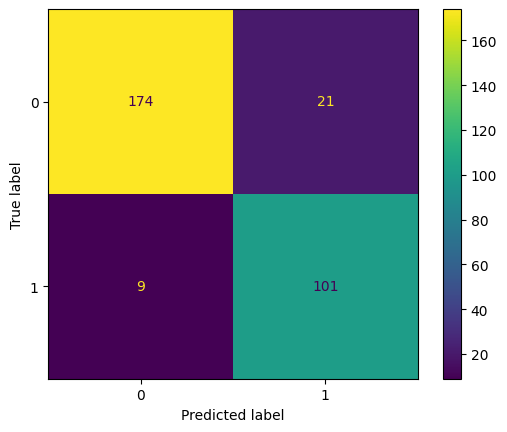

In [47]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### SVM Classifier

In [48]:
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)
svm_metrics_binary = calculate_metrics(y_test, y_pred, y_prob, class_labels)
svm_metrics_binary['label-type'] = 'binary'
svm_metrics_binary['model'] = 'SVM'
svm_metrics_binary


,class_label,accuracy,precision,recall,f1_score,area_under_roc,area_under_pr,label-type,model
1,1,0.944262,0.884298,0.972727,0.926407,0.984196,0.967661,binary,SVM


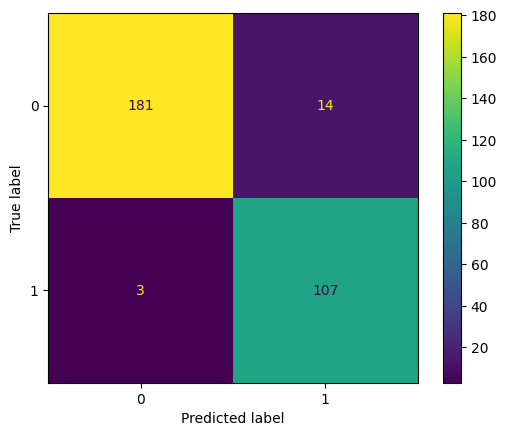

In [49]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

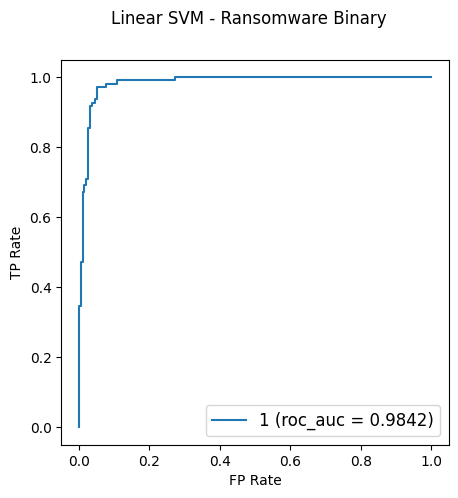

In [50]:
plot_roc_curve_binary(y_test, y_prob, suptitle='Linear SVM - Ransomware Binary')


##  Multi Class

### Preprocessing

In [51]:
y = y_multi
class_labels = sorted(class_labels_multi)
print(class_labels)

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]


In [52]:
# Dividing data into training, testing and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=103)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=103)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1524, 23616) (1524,)
(975, 23616) (975,)
(244, 23616) (244,)
(305, 23616) (305,)


### KNN Classifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)
knn_metrics_multi = calculate_metrics(y_test, y_pred, y_prob, class_labels)
knn_metrics_multi['label-type'] = 'multi'
knn_metrics_multi['with-PCA'] = 'no'
knn_metrics_multi['model'] = 'KNN'
knn_metrics_multi = knn_metrics_multi.sort_values(by='class_label', ignore_index=True)
knn_metrics_multi.drop(knn_metrics_multi.loc[knn_metrics_multi['class_label'].isna()].index)
knn_metrics_multi


C:\Users\Hp\AppData\Local\Temp\ipykernel_1400\546217614.py:29: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2 * recall * precision / (recall + precision)
C:\Users\Hp\AppData\Local\Temp\ipykernel_1400\546217614.py:29: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2 * recall * precision / (recall + precision)
C:\Users\Hp\AppData\Local\Temp\ipykernel_1400\546217614.py:29: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2 * recall * precision / (recall + precision)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer